In [1]:
from keras.models import load_model
import sys
import numpy as np
import glob
import os
import h5py
from Generator import DriveDataGenerator

if ('../../PythonClient/' not in sys.path):
    sys.path.insert(0, '../../PythonClient/')
from AirSimClient import *

# << Set this to the path of the model >>
# If None, then the model with the lowest validation loss from training will be used
MODEL_PATH = None

if (MODEL_PATH == None):
    models = glob.glob('model/models/*.h5') 
    best_model = max(models, key=os.path.getctime)
    MODEL_PATH = best_model
    
print('Using model {0} for testing.'.format(MODEL_PATH))

model = load_model(MODEL_PATH)

Using TensorFlow backend.
E:\Tools\Anaconda3\envs\airsim-tensorflow18_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Tools\Anaconda3\envs\airsim-tensorflow18_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Tools\Anaconda3\envs\airsim-tensorflow18_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Tools\An

Using model model/models\model_model.21-0.0002257.h5 for testing.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
# << 配置前一步预处理好的数据集目录 >>
COOKED_DATA_DIR = '../../../AirSim/EndToEndLearningRawData/data_cooked1/'

train_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'train.h5'), 'r')
eval_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'eval.h5'), 'r')
test_dataset = h5py.File(os.path.join(COOKED_DATA_DIR, 'test.h5'), 'r')

num_train_examples = train_dataset['image'].shape[0]
num_eval_examples = eval_dataset['image'].shape[0]
num_test_examples = test_dataset['image'].shape[0]

batch_size=32

data_generator = DriveDataGenerator(rescale=1./255., horizontal_flip=True, brighten_range=0.4)
train_generator = data_generator.flow\
    (train_dataset['image'], train_dataset['previous_state'], train_dataset['label'], batch_size=batch_size, zero_drop_percentage=0.95, roi=[76,135,0,255])
eval_generator = data_generator.flow\
    (eval_dataset['image'], eval_dataset['previous_state'], eval_dataset['label'], batch_size=batch_size, zero_drop_percentage=0.95, roi=[76,135,0,255]) 

test_generator = data_generator.flow\
    (test_dataset['image'], test_dataset['previous_state'], test_dataset['label'], batch_size=batch_size, zero_drop_percentage=0.95, roi=[76,135,0,255]) 
          

In [4]:
from keras.preprocessing import image
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import keras.backend as K

def draw_image_with_label(img, label, prediction=None):
    theta = label * 0.69 #Steering range for the car is +- 40 degrees -> 0.69 radians
    line_length = 50
    line_thickness = 3
    label_line_color = (255, 0, 0)
    prediction_line_color = (0, 0, 255)
    pil_image = image.array_to_img(img, K.image_data_format(), scale=True)
    print('Actual Steering Angle = {0}'.format(label))
    draw_image = pil_image.copy()
    image_draw = ImageDraw.Draw(draw_image)
    first_point = (int(img.shape[1]/2),img.shape[0])
    second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
    image_draw.line([first_point, second_point], fill=label_line_color, width=line_thickness)
    
    if (prediction is not None):
        print('Predicted Steering Angle = {0}'.format(prediction))
        print('L1 Error: {0}'.format(abs(prediction-label)))
        theta = prediction * 0.69
        second_point = (int((img.shape[1]/2) + (line_length * math.sin(theta))), int(img.shape[0] - (line_length * math.cos(theta))))
        image_draw.line([first_point, second_point], fill=prediction_line_color, width=line_thickness)
    
    del image_draw
    plt.imshow(draw_image)
    plt.show()


sample_batch_train_data:(26, 59, 255, 3)
[0.00584152]
Actual Steering Angle = [0.00262433]
Predicted Steering Angle = [0.00584152]
L1 Error: [0.00321719]


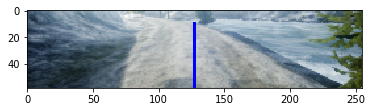

[-0.06639001]
Actual Steering Angle = [-0.07221033]
Predicted Steering Angle = [-0.06639001]
L1 Error: [0.00582033]


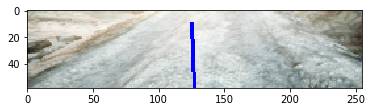

[0.03246966]
Actual Steering Angle = [0.031576]
Predicted Steering Angle = [0.03246966]
L1 Error: [0.00089366]


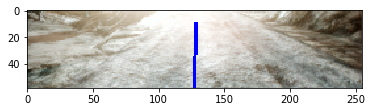

[0.05181246]
Actual Steering Angle = [0.044786]
Predicted Steering Angle = [0.05181246]
L1 Error: [0.00702646]


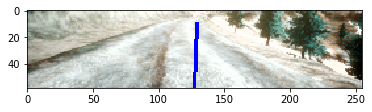

[0.03280537]
Actual Steering Angle = [0.02232533]
Predicted Steering Angle = [0.03280537]
L1 Error: [0.01048003]


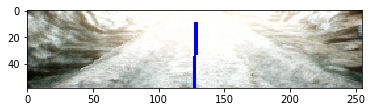

[-0.04062374]
Actual Steering Angle = [-0.045707]
Predicted Steering Angle = [-0.04062374]
L1 Error: [0.00508326]


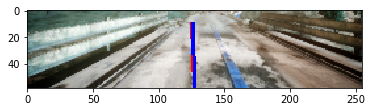

[0.1655214]
Actual Steering Angle = [0.17877833]
Predicted Steering Angle = [0.1655214]
L1 Error: [0.01325694]


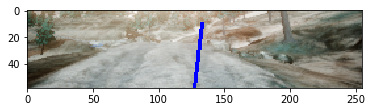

[-0.18616079]
Actual Steering Angle = [-0.155694]
Predicted Steering Angle = [-0.18616079]
L1 Error: [0.03046679]


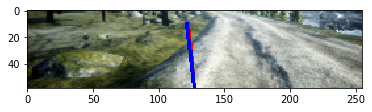

[-0.09431005]
Actual Steering Angle = [-0.094075]
Predicted Steering Angle = [-0.09431005]
L1 Error: [0.00023505]


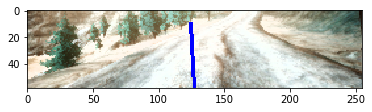

[-0.05058445]
Actual Steering Angle = [-0.07647033]
Predicted Steering Angle = [-0.05058445]
L1 Error: [0.02588588]


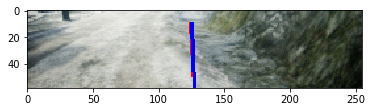

[0.00541656]
Actual Steering Angle = [0.00450333]
Predicted Steering Angle = [0.00541656]
L1 Error: [0.00091323]


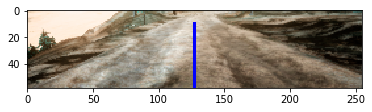

[0.19295128]
Actual Steering Angle = [0.20520033]
Predicted Steering Angle = [0.19295128]
L1 Error: [0.01224906]


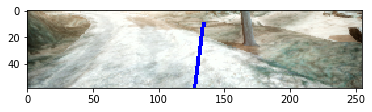

[0.2510311]
Actual Steering Angle = [0.24941667]
Predicted Steering Angle = [0.2510311]
L1 Error: [0.00161443]


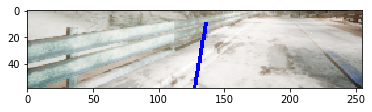

[0.03247447]
Actual Steering Angle = [0.035086]
Predicted Steering Angle = [0.03247447]
L1 Error: [0.00261153]


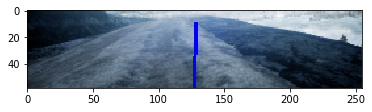

[0.08927227]
Actual Steering Angle = [0.09606867]
Predicted Steering Angle = [0.08927227]
L1 Error: [0.0067964]


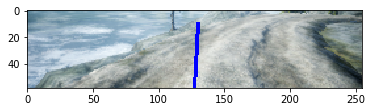

[-0.00687347]
Actual Steering Angle = [-0.00065433]
Predicted Steering Angle = [-0.00687347]
L1 Error: [0.00621914]


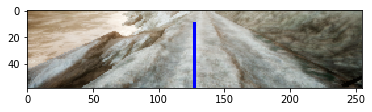

[-0.0470629]
Actual Steering Angle = [-0.04238333]
Predicted Steering Angle = [-0.0470629]
L1 Error: [0.00467957]


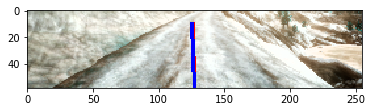

[-0.01194115]
Actual Steering Angle = [-0.053372]
Predicted Steering Angle = [-0.01194115]
L1 Error: [0.04143085]


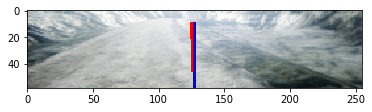

[-0.08818734]
Actual Steering Angle = [-0.077786]
Predicted Steering Angle = [-0.08818734]
L1 Error: [0.01040134]


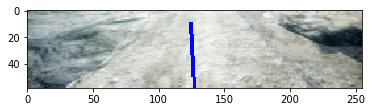

[0.01272582]
Actual Steering Angle = [0.009939]
Predicted Steering Angle = [0.01272582]
L1 Error: [0.00278682]


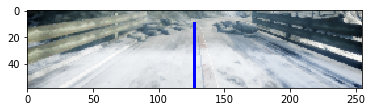

[0.15677388]
Actual Steering Angle = [0.16365733]
Predicted Steering Angle = [0.15677388]
L1 Error: [0.00688345]


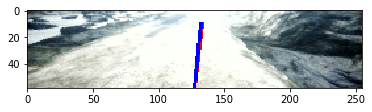

[0.46999055]
Actual Steering Angle = [0.443315]
Predicted Steering Angle = [0.46999055]
L1 Error: [0.02667555]


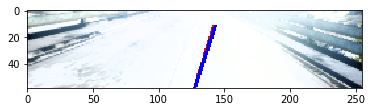

[-0.09813324]
Actual Steering Angle = [-0.09693733]
Predicted Steering Angle = [-0.09813324]
L1 Error: [0.0011959]


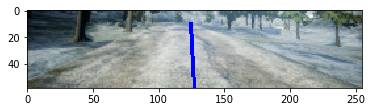

[0.03386877]
Actual Steering Angle = [0.024506]
Predicted Steering Angle = [0.03386877]
L1 Error: [0.00936277]


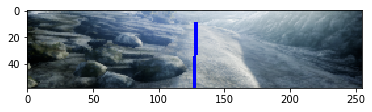

[-0.0273814]
Actual Steering Angle = [-0.013896]
Predicted Steering Angle = [-0.0273814]
L1 Error: [0.0134854]


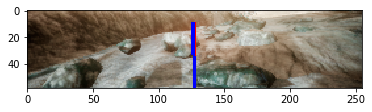

[0.00153801]
Actual Steering Angle = [0.00193967]
Predicted Steering Angle = [0.00153801]
L1 Error: [0.00040166]


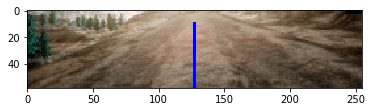

In [10]:
TIMESETPS = 6

[sample_batch_train_data, sample_batch_test_data] = next(test_generator)
print(f"sample_batch_train_data:{sample_batch_train_data[0].shape}")
predictions = model.predict([sample_batch_train_data[0], sample_batch_train_data[1]])

for i in range(0, sample_batch_train_data[0].shape[0], 1):
    print(predictions[i])
    draw_image_with_label(sample_batch_train_data[0][i], sample_batch_test_data[i], predictions[i])    
    # draw_image_with_label(sample_batch_train_data[0][i], sample_batch_test_data[i])
    # 修改代码开始
    # print(sample_batch_train_data[0][i].shape)
    # for k, img_multi_ch in enumerate(sample_batch_train_data[0][i]):
    #     # print(img_multi_ch.shape)
    #     # 取6个时间步最后1个时间步的预测值展示
    #     if k == TIMESETPS-1:
    #         for idx in np.arange(0, img_multi_ch.shape[2]/3, dtype=np.uint8):
    #             print(predictions[i])
    #             draw_image_with_label(img_multi_ch[:, :, idx*3:idx*3 + 3], sample_batch_test_data[i], predictions[i])

In [ ]:
import numpy as np

for i in np.arange(0, 3//3):
    print(i)

0
